In [1]:
import pandas as pd

neon_colour = '#AD67E4'
tallo_colour = '#B8E467'

data_dir = '../data/to_publish/'
fig_dir = f'{data_dir}figs/'
# Read in Tallo and Neon

inaturalist_df = pd.read_csv(f'{data_dir}raw/inaturalist_observations-406349.csv')
ag_species = ['Gossypium', 'Triticum', 'Zea mays', 'sativa', 'Sorghum', 'Oryza', 'Avena sativa',
              'Vitis vinifera', 'Solanum lycopersicum', 'Nicotiana tabacum', 'Brassica napus']
#ag_species = ['Cotton', 'Wheat']

ag_sp = []
for c in inaturalist_df['taxon_species_name'].values:
    ag = False
    for a in ag_species:
        if isinstance(c, str):
            if a.lower() in c.lower():
                ag_sp.append(a)
                ag = True
                break
    if not ag:
        ag_sp.append('-')
inaturalist_df['ag'] = ag_sp
ag_df = inaturalist_df[inaturalist_df['ag'].isin(ag_species)]

# Also extract agriculture from this (need to do a proper one)
neon_df = pd.read_csv(f'{data_dir}raw/neon_vst_data_2022.csv')
# Read in the updated species list
species_df = pd.read_csv(f'{data_dir}species_list_renamed.csv', index_col=0)
# Join the two dataframes as in update the species lists in the NEON dataframe
genera = species_df['Genus'].values
species_df['species'] = [f'{genera[i]} {s.lower()}' for i, s in enumerate(species_df['Species'].values)]
species_df['species'].value_counts()
label_to_species = dict(zip(species_df.Taxon, species_df.species))
label_to_genus = dict(zip(species_df.Taxon, species_df.Genus))
label_to_family = dict(zip(species_df.Taxon, species_df.Family))
# Also need to do some data processing since the lat and long are annoying!
neon_df['longitude'] = [float(x.split("(")[1].split(",")[0]) for x in neon_df['geometry'].values]
neon_df['latitude'] = [float(x.split(" ")[1].split(")")[0])for x in neon_df['geometry'].values]
neon_df['species'] = [label_to_species.get(s) for s in neon_df['scientificName'].values]
neon_df['genera'] = [label_to_genus.get(s) for s in neon_df['scientificName'].values]
neon_df['family'] = [label_to_family.get(s) for s in neon_df['scientificName'].values]


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_60316/1620764995.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  inaturalist_df = pd.read_csv(f'{data_dir}raw/inaturalist_observations-406349.csv')
/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_60316/1620764995.py:30: DtypeWarning: Columns (34,35,40,41,42,47) have mixed types. Specify dtype option on import or set low_memory=False.
  neon_df = pd.read_csv(f'{data_dir}raw/neon_vst_data_2022.csv')


In [2]:
neon_df = neon_df[neon_df['plantStatus'] == 'Live']
neon_df = neon_df[neon_df['height'] > 10]

In [3]:
neon_df['id'] = [f'neon_{i}' for i in neon_df['individualID'].values]


In [4]:
# Drop duplicates based on coordinates 
neon_df = neon_df.drop_duplicates(subset=['latitude', 'longitude'], keep=False)
neon_df

,Unnamed: 0,uid.x,individualID,eventID,tagStatus,growthForm,plantStatus,stemDiameter,measurementHeight,height,...,vertUncert,nlcdClass,appMods,geometry,itcEasting,itcNorthing,species,genera,family,id
478,1026,17fd3fee-1aa9-4a80-a4c2-2f0ca8620337,NEON.PLA.D01.BART.04534,vst_BART_2015,NaN,single bole tree,Live,32.1,130.0,13.6,...,0.16,deciduousForest,bbc|bgc|cdw|cfc|dhp|hbp|ltr|sme|vst,"c(-71.285616, 44.062252)",316936.658275,4.881320e+06,Betula alleghaniensis,Betula,Betulaceae,neon_NEON.PLA.D01.BART.04534
491,1052,7940ad6a-8203-4704-b3d7-c34009ddd9d4,NEON.PLA.D01.BART.04326,vst_BART_2015,NaN,single bole tree,Live,12.3,130.0,13.7,...,0.21,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.285675, 44.059952)",316940.657260,4.881075e+06,Fagus grandifolia,Fagus,Fagaceae,neon_NEON.PLA.D01.BART.04326
2276,5329,e03b5806-9aba-4f71-8627-4cad8e4196ed,NEON.PLA.D01.BART.01384,vst_BART_2016,ok,single bole tree,Live,22.5,130.0,11.5,...,0.35,mixedForest,cdw|cfc|dhp|hbp|vst,"c(-71.27301, 44.042819)",317887.774094,4.879142e+06,Tsuga canadensis,Tsuga,Pinaceae,neon_NEON.PLA.D01.BART.01384
2295,5371,420bc757-1aac-40c3-9b3a-3107302655d3,NEON.PLA.D01.BART.01353,vst_BART_2016,ok,single bole tree,Live,19.0,130.0,10.9,...,0.39,mixedForest,cdw|cfc|dhp|hbp|vst,"c(-71.273002, 44.042997)",317893.371587,4.879158e+06,Tsuga canadensis,Tsuga,Pinaceae,neon_NEON.PLA.D01.BART.01353
2328,5458,c4258664-3b08-4203-af7f-4f0b6e4776ca,NEON.PLA.D01.BART.00505,vst_BART_2016,ok,single bole tree,Live,49.8,130.0,24.8,...,0.39,mixedForest,cdw|cfc|dhp|hbp|vst,"c(-71.288737, 44.051424)",316679.175642,4.880121e+06,Tsuga canadensis,Tsuga,Pinaceae,neon_NEON.PLA.D01.BART.00505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100517,366724,23c0e77c-daa6-4b4e-bccc-18ead26a2039,NEON.PLA.D20.PUUM.03022,vst_PUUM_2020,ok,single bole tree,Live,14.8,130.0,10.3,...,0.36,evergreenForest,bgc|cdw|cfc|dhp|hbp|sme|vst,"c(-155.249624, 19.561142)",263991.919864,2.164467e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae,neon_NEON.PLA.D20.PUUM.03022
100525,366743,8c12dcfc-04ce-4a28-b6ae-ae5d8dfce899,NEON.PLA.D20.PUUM.05607,vst_PUUM_2020,ok,single bole tree,Live,94.5,2.0,19.9,...,0.20,evergreenForest,bgc|cdw|cfc|dhp|hbp|sme|vst,"c(-155.230177, 19.557838)",266024.171810,2.164075e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae,neon_NEON.PLA.D20.PUUM.05607
100529,366752,8a4922f8-f8de-4fac-9771-6d01033b5b29,NEON.PLA.D20.PUUM.03365,vst_PUUM_2020,ok,single bole tree,Live,35.9,130.0,19.7,...,0.21,evergreenForest,bgc|cdw|cfc|dhp|hbp|sme|vst,"c(-155.230186, 19.557667)",266021.470327,2.164060e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae,neon_NEON.PLA.D20.PUUM.03365
100579,366948,956999f0-c8d0-44bd-89db-00518b16f500,NEON.PLA.D20.PUUM.02893,vst_PUUM_2020,ok,single bole tree,Live,21.5,140.0,17.4,...,0.86,evergreenForest,bgc|cdw|cfc|dhp|hbp|sme|vst,"c(-155.228956, 19.554334)",266152.504040,2.163683e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae,neon_NEON.PLA.D20.PUUM.02893


In [5]:
# Drop duplicates based on coordinates 
inaturalist_df = inaturalist_df.drop_duplicates(subset=['latitude', 'longitude'], keep=False)
inaturalist_df

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,taxon_id,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,ag
0,37160480,2020-01-01 11:01:02 AM EST,2020-01-01,2020-01-01 16:01:02 UTC,Eastern Time (US & Canada),2169795,norwichtim,Timothy Grover,2020-01-01 16:03:17 UTC,2023-03-09 14:48:12 UTC,...,52391,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Pinus,Pinus strobus,NaN,-
1,37161897,Wed Jan 01 2020 11:57:24 GMT-0500 (EST),2020-01-01,2020-01-01 16:57:24 UTC,Eastern Time (US & Canada),1888229,housa03,NaN,2020-01-01 17:00:08 UTC,2022-03-13 12:40:27 UTC,...,54779,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus alba,NaN,-
2,37165925,2020-01-01 12:50:58 PM EST,2020-01-01,2020-01-01 17:50:58 UTC,Eastern Time (US & Canada),765315,matushkaelizabethperdomo,Matushka Elizabeth Perdomo,2020-01-01 19:20:48 UTC,2020-01-02 14:14:10 UTC,...,169048,Plantae,Tracheophyta,Liliopsida,Liliales,Smilacaceae,Smilax,Smilax smallii,NaN,-
3,37171371,Wed Jan 01 2020 10:56:29 GMT-0800 (PST),2020-01-01,2020-01-01 18:56:29 UTC,Pacific Time (US & Canada),19715,gbentall,Gena Bentall,2020-01-01 21:56:29 UTC,2020-03-11 00:00:35 UTC,...,69823,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Notholithocarpus,Notholithocarpus densiflorus,NaN,-
4,37172020,Wed Jan 01 2020 15:56:14 GMT-0600 (CST),2020-01-01,2020-01-01 15:56:14 UTC,UTC,957274,jkilfeather,NaN,2020-01-01 22:18:23 UTC,2020-12-15 00:00:03 UTC,...,77740,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Oleaceae,Ligustrum,Ligustrum lucidum,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99522,200470601,2023-04-22 08:49:49-07:00,2023-04-22,2023-04-22 15:49:49 UTC,Pacific Time (US & Canada),1195388,coreyhusic,Corey Husic,2024-02-26 01:54:54 UTC,2024-02-27 23:16:39 UTC,...,58309,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rosaceae,Prunus,Prunus fasciculata,NaN,-
99523,200477134,2022/04/30 10:23 AM,2022-04-30,2022-04-30 14:23:00 UTC,Eastern Time (US & Canada),7703963,ijamesmac71,NaN,2024-02-26 03:04:11 UTC,2024-02-28 01:53:20 UTC,...,52391,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Pinus,Pinus strobus,NaN,-
99524,200600833,2023-02-26 16:26:38-08:00,2023-02-26,2023-02-27 00:26:38 UTC,Pacific Time (US & Canada),6097240,devino_bambino,NaN,2024-02-27 09:11:31 UTC,2024-02-27 20:17:54 UTC,...,50171,Plantae,Tracheophyta,Magnoliopsida,Boraginales,Boraginaceae,Phacelia,Phacelia campanularia,NaN,-
99525,200651794,2023-02-26 15:53:47-08:00,2023-02-26,2023-02-26 23:53:47 UTC,Pacific Time (US & Canada),6097240,devino_bambino,NaN,2024-02-27 20:36:31 UTC,2024-02-27 21:07:50 UTC,...,50184,Plantae,Tracheophyta,Liliopsida,Arecales,Arecaceae,Washingtonia,Washingtonia filifera,NaN,-


In [6]:
inaturalist_df['id'] = [f'inaturalist_{i}' for i in inaturalist_df['id'].values]


(array([164.,  60.,  43.,  28.,  21.,  16.,  15.,   5.,   3.,   3.,   1.,
          3.,   1.,   2.,   2.,   1.,   2.,   0.,   2.,   1.]),
 array([10.1 , 12.65, 15.2 , 17.75, 20.3 , 22.85, 25.4 , 27.95, 30.5 ,
        33.05, 35.6 , 38.15, 40.7 , 43.25, 45.8 , 48.35, 50.9 , 53.45,
        56.  , 58.55, 61.1 ]),
 <BarContainer object of 20 artists>)

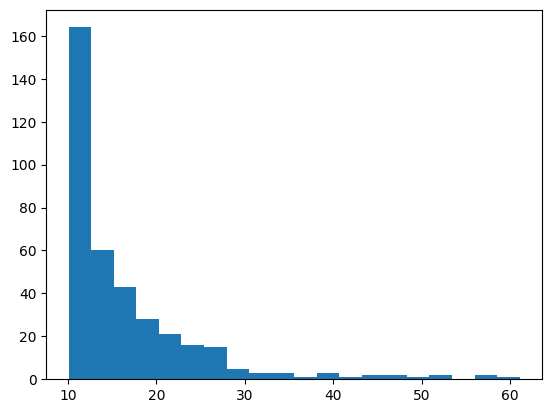

In [7]:
import matplotlib.pyplot as plt
plt.hist(neon_df['height'], bins=20)

In [10]:
schools = pd.read_csv(f'../data/benchmark/2024-2-23-iolp-buildings.csv')
schools.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)
schools

,Location Code,Real Property Asset Name,Installation Name,Owned or Leased,GSA Region,Street Address,City,State,Zip Code,latitude,longitude,Building Rentable Square Feet,Available Square Feet,Construction Date,Congressional District,Congressional District Representative Name,Building Status,Real Property Asset Type
0,AZ8543,1840 N. 95TH AVE,NaN,L,9,1840 N. 95TH AVE,PHOENIX,AZ,85037,33.467201,-112.265509,7194.0,0.0,2000.0,403,Ruben Gallego,Active,BUILDING
1,GA2338,THOMPSON BRIDGE RD BLDG,NaN,L,4,2565 THOMPSON BRIDGE RD,GAINESVILLE,GA,30501,34.339030,-83.848641,17844.0,0.0,2000.0,1309,Andrew Clyde,Active,BUILDING
2,WI1771,345 WEST WASHINGTON AVENUE,NaN,L,5,345 W WASHINGTON AVE,MADISON,WI,53703,43.071400,-89.387941,10089.0,0.0,2000.0,5502,Mark Pocan,Active,BUILDING
3,MN1743,1301 1/2 7TH ST. NW,NaN,L,5,1301 1/2 7TH ST NW,ROCHESTER,MN,55901,44.031849,-92.481598,3041.0,0.0,2000.0,2701,Brad Finstad,Active,BUILDING
4,MD1008,WOODLAWN OFFICE COMPLEX,NaN,L,3,1718 WOODLAWN DR,WOODLAWN,MD,21207,39.314760,-76.737771,160810.0,0.0,2000.0,2407,Kweisi Mfume,Active,BUILDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,TN2174,1885 SHADY BROOK BLDG,NaN,L,4,1885 SHADY BROOK ST,COLUMBIA,TN,38401,35.601290,-87.056861,10533.0,0.0,2000.0,4705,Andrew Ogles,Active,BUILDING
8607,CA8312,TOURNEY POINTE,NaN,L,9,27200 TOURNEY RD,VALENCIA,CA,91355,34.416810,-118.575260,9381.0,0.0,2000.0,627,Mike Garcia,Active,BUILDING
8608,MT5361,GLITTERING HILLS CTR,NaN,L,8,2201 HARRISON AVE,BUTTE,MT,59701,45.990740,-112.512000,5764.0,0.0,2000.0,3001,Ryan Zinke,Active,BUILDING
8609,CA6044,1324 MANGROVE AVENUE,NaN,L,9,1324 MANGROVE AVE,CHICO,CA,95926,39.744000,-121.839180,315.0,0.0,1982.0,601,Doug LaMalfa,Active,BUILDING


In [11]:
schools.drop_duplicates('Location Code', inplace=True)

In [12]:
schools['id'] = [f'school_{i}' for i in schools['Location Code'].values]


In [13]:
water = pd.read_csv(f'../data/benchmark/Navigable_Waterway_Network_Nodes.csv')
water.rename(columns={'X': 'longitude', 'Y': 'latitude'}, inplace=True)

In [14]:
water['id'] = [f'water_{i}' for i in water['ID'].values]

In [15]:
#latdd	longdd
bridges = pd.read_csv(f'../data/benchmark/National_Bridge_Inventory.csv')
bridges.rename(columns={'latdd': 'latitude', 'longdd': 'longitude'}, inplace=True)
print(len(bridges))
bridges['id'] = [f'bridge_{i}' for i in bridges['objectid'].values]

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_60316/2427764069.py:2: DtypeWarning: Columns (4,8,10,20,34,39,41,42,74,76,78,99,101,105,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  bridges = pd.read_csv(f'../data/benchmark/National_Bridge_Inventory.csv')


621581


In [16]:
bridges = bridges.sample(1000)
schools = schools.sample(1000)
water = water.sample(1000)


In [17]:
ag_df['id'] = [f'ag_{i}' for i in ag_df['id'].values]



In [18]:
columns = ['id', 'latitude', 'longitude']
df = pd.concat([bridges[columns], schools[columns], water[columns], ag_df[columns], inaturalist_df[columns], ag_df[columns], neon_df[columns]])

In [19]:
columns = ['id', 'latitude', 'longitude']
df = pd.concat([bridges[columns], schools[columns], water[columns], ag_df[columns]])



In [21]:
df.to_csv(f'{data_dir}training_not_trees.csv', index=False)

In [22]:
df

,id,latitude,longitude
20723,bridge_20724,34.050414,-109.539883
107175,bridge_107176,33.723014,-82.618308
33773,bridge_33774,33.995942,-93.281464
123168,bridge_123169,40.569097,-87.822489
178519,bridge_178520,42.225111,-92.424703
...,...,...,...
95764,ag_ag_189442200,32.151747,-110.602341
95802,ag_ag_189530478,43.316944,-91.777776
96039,ag_ag_190009385,34.152580,-116.339713
97992,ag_ag_193883957,34.108906,-116.333867


In [68]:
vals = inaturalist_df['taxon_species_name'].value_counts()

In [77]:
species = vals[vals > 200]
species_training = list(species.index) 
neon_vals = set(neon_df['species'].values)
species_training = list(set(species_training) & neon_vals)
len(species_training)

23

In [78]:

inat = inaturalist_df[inaturalist_df['taxon_species_name'].isin(species_training)]
inat

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,taxon_id,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,ag
0,inaturalist_37160480,2020-01-01 11:01:02 AM EST,2020-01-01,2020-01-01 16:01:02 UTC,Eastern Time (US & Canada),2169795,norwichtim,Timothy Grover,2020-01-01 16:03:17 UTC,2023-03-09 14:48:12 UTC,...,52391,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Pinus,Pinus strobus,NaN,-
1,inaturalist_37161897,Wed Jan 01 2020 11:57:24 GMT-0500 (EST),2020-01-01,2020-01-01 16:57:24 UTC,Eastern Time (US & Canada),1888229,housa03,NaN,2020-01-01 17:00:08 UTC,2022-03-13 12:40:27 UTC,...,54779,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus alba,NaN,-
7,inaturalist_37174068,Wed Jan 01 2020 14:32:39 GMT-0500 (EST),2020-01-01,2020-01-01 19:32:39 UTC,Eastern Time (US & Canada),799964,syvwlch,NaN,2020-01-01 23:14:57 UTC,2023-01-29 23:44:55 UTC,...,56088,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,NaN,-
30,inaturalist_37231020,Fri Jan 03 2020 12:23:46 GMT-0500 (EST),2020-01-03,2020-01-03 17:23:46 UTC,Eastern Time (US & Canada),1111806,fredocruz,Alfredo Cruz,2020-01-03 17:25:58 UTC,2020-01-10 21:05:24 UTC,...,52391,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Pinus,Pinus strobus,NaN,-
32,inaturalist_37239498,Fri Jan 03 2020 17:08:59 GMT-0500 (EST),2020-01-03,2020-01-03 22:08:59 UTC,Eastern Time (US & Canada),120779,johnboback,John Boback,2020-01-03 22:09:50 UTC,2020-01-04 02:28:26 UTC,...,49202,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Fagus,Fagus grandifolia,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,inaturalist_198932043,2023/05/23 8:46 AM,2023-05-23,2023-05-23 12:46:00 UTC,Eastern Time (US & Canada),328354,fraleigh,Fran Raleigh,2024-02-10 21:20:33 UTC,2024-02-11 19:56:41 UTC,...,49202,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Fagus,Fagus grandifolia,NaN,-
99501,inaturalist_199823555,2023/07/10 12:03 PM,2023-07-10,2023-07-10 16:03:00 UTC,America/Nipigon,969425,pantherophis,Jakob Mueller,2024-02-19 19:40:03 UTC,2024-02-20 02:38:41 UTC,...,49005,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus rubra,NaN,-
99502,inaturalist_199912841,2023/10/15 11:46 AM,2023-10-15,2023-10-15 15:46:00 UTC,Eastern Time (US & Canada),5703429,william_deml,William J. Deml,2024-02-20 17:46:56 UTC,2024-02-21 14:46:06 UTC,...,47726,Plantae,Tracheophyta,Magnoliopsida,Sapindales,Sapindaceae,Acer,Acer negundo,NaN,-
99509,inaturalist_200321684,2022/02/21 3:39 PM,2022-02-21,2022-02-21 20:39:00 UTC,Eastern Time (US & Canada),7703963,ijamesmac71,NaN,2024-02-24 21:33:01 UTC,2024-02-26 02:32:53 UTC,...,54779,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus alba,NaN,-


In [82]:
# Randomly subsample 200 from each 
df = pd.DataFrame()
for s in species_training:
    sp_df = inat[inat['taxon_species_name'] == s]
    sp_df = sp_df.sample(200)
    df = pd.concat([df, sp_df])
df['class'] = 'A'
df.to_csv(f'{data_dir}training_inat.csv')

In [81]:
df

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,taxon_id,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,ag
38171,inaturalist_88323763,2021-07-23 19:30:32,2021-07-23,2021-07-23 19:30:32 UTC,UTC,4770006,steven817,Steven Hipsher,2021-07-23 23:39:16 UTC,2021-10-12 14:19:11 UTC,...,49658,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Altingiaceae,Liquidambar,Liquidambar styraciflua,NaN,-
33795,inaturalist_78272943,Mon May 10 2021 17:01:46 GMT-0400 (EDT),2021-05-10,2021-05-10 21:01:46 UTC,Eastern Time (US & Canada),1750470,hi-,NaN,2021-05-10 21:04:03 UTC,2021-07-21 20:21:21 UTC,...,49658,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Altingiaceae,Liquidambar,Liquidambar styraciflua,NaN,-
16283,inaturalist_59496505,2020-09-13T14:29:29-05:00,2020-09-13,2020-09-13 19:29:29 UTC,Central Time (US & Canada),3539896,jpeacocke,NaN,2020-09-13 20:44:50 UTC,2020-12-17 02:35:23 UTC,...,49658,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Altingiaceae,Liquidambar,Liquidambar styraciflua,NaN,-
59144,inaturalist_117929064,2022-05-20 17:19:35-05:00,2022-05-20,2022-05-20 22:19:35 UTC,Central Time (US & Canada),5703801,sweetgumobserver,NaN,2022-05-20 22:52:55 UTC,2022-07-05 00:18:13 UTC,...,49658,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Altingiaceae,Liquidambar,Liquidambar styraciflua,NaN,-
54962,inaturalist_110916310,Sat Apr 09 2022 20:13:02 GMT -0400 (EDT),2022-04-09,2022-04-10 00:13:02 UTC,Eastern Time (US & Canada),2974452,coakley77,NaN,2022-04-10 01:42:33 UTC,2022-04-18 21:45:33 UTC,...,49658,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Altingiaceae,Liquidambar,Liquidambar styraciflua,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94603,inaturalist_187509824,2023-10-13 09:48:22,2023-10-13,2023-10-13 16:48:22 UTC,Pacific Time (US & Canada),3937945,drew_meyer,Drew Meyer,2023-10-14 16:34:45 UTC,2023-10-16 04:26:49 UTC,...,49005,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus rubra,NaN,-
51433,inaturalist_107225910,Mon Feb 21 2022 12:48:31 GMT-0500 (EST),2022-02-21,2022-02-21 17:48:31 UTC,Eastern Time (US & Canada),572980,sadawolk,Sandy Wolkenberg,2022-02-22 02:08:01 UTC,2022-02-22 02:14:49 UTC,...,49005,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus rubra,NaN,-
3673,inaturalist_40147412,2020/03/17 12:56 PM EDT,2020-03-17,2020-03-17 16:56:00 UTC,Eastern Time (US & Canada),168813,markolivier,Mark Olivier,2020-03-17 21:26:15 UTC,2020-03-17 22:29:55 UTC,...,49005,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus rubra,NaN,-
7796,inaturalist_45864795,Wed May 13 2020 19:30:00 GMT-0300 (ADT),2020-05-13,2020-05-13 22:30:00 UTC,Atlantic Time (Canada),323903,sandwich,Cody Chapman,2020-05-14 12:49:38 UTC,2020-05-14 12:51:19 UTC,...,49005,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus rubra,NaN,-


In [ ]:
inaturalist_df[inaturalist_df[]]

In [64]:
inaturalist_df[columns].to_csv(f'{data_dir}inat.csv')

In [47]:
df.to_csv(f'{data_dir}combined_df.csv', index=False)



In [51]:
df.to_csv(f'{data_dir}combined_df.csv', index=False)

In [50]:
df['class'] = 'A'

In [46]:
94532*3 # Not that many m2! should be within the quota so can get an image for the different seasons for each site

283596

In [53]:
summer_2022 = ["2022-06-01T00:00:00.000Z", "2022-08-30T00:00:00.000Z",
               "2022-12-01T00:00:00.000Z", "2023-02-26T00:00:00.000Z"]

winter_2022 = ["2022-01-12T00:00:00.000Z", "2023-02-26T00:00:00.000Z",
               "2022-06-01T00:00:00.000Z", "2022-08-30T00:00:00.000Z"]

spring_2022 = ["2022-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z",
               "2022-09-01T00:00:00.000Z", "2022-10-30T00:00:00.000Z"]

autumn_2022 = ["2022-09-01T00:00:00.000Z", "2022-10-30T00:00:00.000Z",
               "2022-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z"]

summer_2023 = ["2023-06-01T00:00:00.000Z", "2023-08-30T00:00:00.000Z",
               "2023-12-01T00:00:00.000Z", "2023-02-26T00:00:00.000Z"]

winter_2023 = ["2023-01-12T00:00:00.000Z", "2023-02-26T00:00:00.000Z",
               "2023-06-01T00:00:00.000Z", "2023-08-30T00:00:00.000Z"]

spring_2023 = ["2023-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z",
               "2023-09-01T00:00:00.000Z", "2023-10-30T00:00:00.000Z"]

autumn_2023 = ["2023-09-01T00:00:00.000Z", "2023-10-30T00:00:00.000Z",
               "2023-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z"]

summer_2021 = ["2021-06-01T00:00:00.000Z", "2021-08-30T00:00:00.000Z",
               "2021-12-01T00:00:00.000Z", "2021-02-26T00:00:00.000Z"]

winter_2021 = ["2021-01-12T00:00:00.000Z", "2021-02-26T00:00:00.000Z",
               "2021-06-01T00:00:00.000Z", "2021-08-30T00:00:00.000Z"]

spring_2021 = ["2021-04-01T00:00:00.000Z", "2021-05-30T00:00:00.000Z",
               "2021-09-01T00:00:00.000Z", "2021-10-30T00:00:00.000Z"]

autumn_2021 = ["2021-09-01T00:00:00.000Z", "2021-10-30T00:00:00.000Z",
               "2021-04-01T00:00:00.000Z", "2021-05-30T00:00:00.000Z"]


In [61]:
import pandas as pd

neon_colour = '#AD67E4'
tallo_colour = '#B8E467'

data_dir = '../data/to_publish/'
fig_dir = f'{data_dir}figs/'
# Read in Tallo and Neon

summer_2022 = ["2022-06-01T00:00:00.000Z", "2022-08-30T00:00:00.000Z",
               "2022-12-01T00:00:00.000Z", "2023-02-26T00:00:00.000Z"]

winter_2022 = ["2022-01-12T00:00:00.000Z", "2023-02-26T00:00:00.000Z",
               "2022-06-01T00:00:00.000Z", "2022-08-30T00:00:00.000Z"]

spring_2022 = ["2022-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z",
               "2022-09-01T00:00:00.000Z", "2022-10-30T00:00:00.000Z"]

autumn_2022 = ["2022-09-01T00:00:00.000Z", "2022-10-30T00:00:00.000Z",
               "2022-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z"]

summer_2023 = ["2023-06-01T00:00:00.000Z", "2023-08-30T00:00:00.000Z",
               "2023-12-01T00:00:00.000Z", "2023-02-26T00:00:00.000Z"]

winter_2023 = ["2023-01-12T00:00:00.000Z", "2023-02-26T00:00:00.000Z",
               "2023-06-01T00:00:00.000Z", "2023-08-30T00:00:00.000Z"]

spring_2023 = ["2023-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z",
               "2023-09-01T00:00:00.000Z", "2023-10-30T00:00:00.000Z"]

autumn_2023 = ["2023-09-01T00:00:00.000Z", "2023-10-30T00:00:00.000Z",
               "2023-04-01T00:00:00.000Z", "2023-05-30T00:00:00.000Z"]

summer_2021 = ["2021-06-01T00:00:00.000Z", "2021-08-30T00:00:00.000Z",
               "2021-12-01T00:00:00.000Z", "2021-02-26T00:00:00.000Z"]

winter_2021 = ["2021-01-12T00:00:00.000Z", "2021-02-26T00:00:00.000Z",
               "2021-06-01T00:00:00.000Z", "2021-08-30T00:00:00.000Z"]

spring_2021 = ["2021-04-01T00:00:00.000Z", "2021-05-30T00:00:00.000Z",
               "2021-09-01T00:00:00.000Z", "2021-10-30T00:00:00.000Z"]

autumn_2021 = ["2021-09-01T00:00:00.000Z", "2021-10-30T00:00:00.000Z",
               "2021-04-01T00:00:00.000Z", "2021-05-30T00:00:00.000Z"]


import pandas as pd
from remseno import *

c = Coords(f'{data_dir}combined_df.csv', x_col='longitude', y_col='latitude', label_col='class',
                   id_col='id', sep=',', class1='A', class2='B', crs='EPSG:4326')
df = c.df
ys = df['latitude'].values
bbs = []
meters = 3
for i, x in enumerate(df['longitude'].values):
    bbs.append(c.build_polygon_from_centre_point(x, ys[i], meters, meters, crs='EPSG:4326'))
polygons = []
x0, x1, y0, y1 = [], [], [], []
for bs in bbs:
    cs = []
    for b in bs:
        cs.append([b[0], b[1]])
    polygons.append(cs)
    x0.append(min([x[1] for x in cs]))
    x1.append(max([x[1] for x in cs]))
    y0.append(min([x[0] for x in cs]))
    y1.append(max([x[0] for x in cs]))
df['x0'] = x0
df['x1'] = x1
df['y0'] = y0
df['y1'] = y1

image_ids = []
tree_ids = df['id'].values
# We want to get from summer 2022 
labels = [summer_2022]
# , spring_2021, winter_2021, autumn_2021, 
#           summer_2022, spring_2022, winter_2022, autumn_2022, 
#           summer_2023, spring_2023, winter_2023, autumn_2023 
#          ]
max_count = 3
for xi, x in enumerate(labels):
    for i in tqdm(range(0, len(polygons))):
        try:
            image_ids.append(select_image_ids(f'{data_dir}tree_files/{labels[xi]}_{tree_ids[i]}.csv', polygons[i], x,
                                          max_cloud_cover=0.1, visible_percent=95))
        except Exception as e:
            image_ids.append('NA')

        if i > max_count:
            break
df['image_ids'] = image_ids
df.to_csv(f'{data_dir}combined_df_image_ids.csv', index=False)

--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.	A	B	 in column:	class	Your dataset origionally had:	94532	
Now you have:	94532	
--------------------------------------------------------------------------------


  0%|                                                                  | 2/94532 [00:01<20:31:25,  1.28it/s]

ortho_analytic_8b_sr


  0%|                                                                  | 4/94532 [00:03<23:52:43,  1.10it/s]


In [62]:
image_ids

['20230218_152803_50_2429',
 '20230203_152340_62_24b0',
 '20230215_160832_01_241b',
 '20230202_155453_81_2445',
 '20230213_162318_81_24cf']

In [ ]:
# 283596*12m2 to km2 = 3.403152km2! So can get 3 years of 4 images per year :D 

In [63]:
len(df)

94532